<a href="https://colab.research.google.com/github/giuliasl/processamento_imagens/blob/main/Projeto_M1_%E2%80%93_Opera%C3%A7%C3%B5es_Pontuais_e_Filtragem_Espacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
import matplotlib.pyplot as plt

# 1 - Funções utilizadas:

## Filtro Grayscale

In [11]:
def grayscale(img):
    B, G, R = cv2.split(img)
    img_grayscale_pondered = 0.299*B+0.587*G+0.114*R
    img_grayscale_pondered = np.array(img_grayscale_pondered, dtype=np.uint8)
    return img_grayscale_pondered

## **Filtro Sal e pimenta**

In [12]:
def salpimenta(img):

  sal_pimenta = (random_noise(img / 255.0, mode='s&p', amount=0.02) * 255).astype(np.uint8)

  return sal_pimenta

## Filtro equalização de histograma

In [27]:
def eq_hist(img):

  intervalo_min_max = [0, 256]
  num_pontos = 256
  point_count, point_edges = np.histogram(img.flatten(), bins=num_pontos, range=intervalo_min_max)
  point_start = point_edges[:-1]

  pdf = point_count / np.sum(point_count)

  cdf = np.cumsum(pdf)

  # Equalização do histograma
  f_eq = np.round(cdf * 255).astype(np.uint8)
  img_equalizada = f_eq[img]

  return img_equalizada


In [39]:
histogram = np.zeros(256)
for i in range(imagem_1_grayscale.shape[0]):
    for j in range(imagem_1_grayscale.shape[1]):
        histogram[imagem_1_grayscale[i,j]] += 1

print(histogram[100])

91.0


## Filtro Correção de Gamma

In [28]:
def filtro_gamma(img, c, gamma):

  imagem_gamma = np.array(c*255*(img/255)**gamma, dtype = np.uint8)

  return imagem_gamma

## Funções auxiliares

### Bubble sort

In [29]:
def bubble_sort(arr):

    # Outer loop to iterate through the list n times
    for n in range(len(arr) - 1, 0, -1):

        # Inner loop to compare adjacent elements
        for i in range(n):
            if arr[i] > arr[i + 1]:

                # Swap elements if they are in the wrong order
                swapped = True
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
    return arr

### Padding

In [30]:
def add_padding(img, padding_height, padding_width):
    n, m = img.shape

    padded_img = np.zeros((n + padding_height * 2, m + padding_width * 2))
    padded_img[padding_height : n + padding_height, padding_width : m + padding_width] = img

    return padded_img

### Convolução

In [31]:
def conv2d(img, kernel, padding=True):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape  # Atribui valor à variável k_height, k_width

    # Get dimensions of the image
    img_height, img_width = img.shape  # Atribui valor à variável img_height, img_width

    # Calculate padding required
    pad_height = k_height // 2  # Atribui valor à variável pad_height
    pad_width = k_width // 2  # Atribui valor à variável pad_width

    # Create a padded version of the image to handle edges
    if padding == True:
        padded_img = add_padding(img, pad_height, pad_width)  # Atribui valor à variável padded_img

    #print(padded_img)

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)  # Atribui valor à variável output

    # Perform convolution
    for i_img in range(img_height):  # Loop usando i
        for j_img in range(img_width):  # Loop usando j
            for i_kernel in range(k_height):
                for j_kernel in range(k_width):
                    output[i_img, j_img] = output[i_img, j_img] + (padded_img[i_img+i_kernel, j_img+j_kernel] * kernel[i_kernel, j_kernel])  # Atribui valor à variável output[i, j]
            output[i_img, j_img] = int(output[i_img, j_img])

    return np.array(output, dtype=np.uint8)

### Convolução sharpening

In [32]:
def conv2d_sharpening(img, kernel, padding=True):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape  # Atribui valor à variável k_height, k_width

    # Get dimensions of the image
    img_height, img_width = img.shape  # Atribui valor à variável img_height, img_width

    # Calculate padding required
    pad_height = k_height // 2  # Atribui valor à variável pad_height
    pad_width = k_width // 2  # Atribui valor à variável pad_width

    # Create a padded version of the image to handle edges
    if padding == True:
        padded_img = add_padding(img, pad_height, pad_width)  # Atribui valor à variável padded_img

    #print(padded_img)

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)  # Atribui valor à variável output

    # Perform convolution
    for i_img in range(img_height):  # Loop usando i
        for j_img in range(img_width):  # Loop usando j
            #calcula kernel
            for i_kernel in range(k_height):
                for j_kernel in range(k_width):
                    output[i_img, j_img] = output[i_img, j_img] + (padded_img[i_img+i_kernel, j_img+j_kernel] * kernel[i_kernel, j_kernel])  # Atribui valor à variável output[i, j]
            output[i_img, j_img] = int(output[i_img, j_img])

    return np.array(output, dtype=np.float32)

## Filtro Gaussiano

In [33]:
def gauss_create(sigma=1, size_x=3, size_y=3):
    '''
    Create normal (gaussian) distribuiton
    '''
    x, y = np.meshgrid(np.linspace(-1,1,size_x), np.linspace(-1,1,size_y))
    calc = 1/((2*np.pi*(sigma**2)))
    exp = np.exp(-(((x**2) + (y**2))/(2*(sigma**2))))

    return exp*calc

In [17]:
def filtro_gaussiano(img):
  gaus_3x3 = gauss_create(sigma=1, size_x=3, size_y=3)
  gaus_5x5 = gauss_create(sigma=1, size_x=5, size_y=5)
  gaus_7x7 = gauss_create(sigma=1, size_x=7, size_y=7)

  img_gauss = conv2d(img, gaus_3x3, padding=True)

  return img_gauss

## Filtro Mediana

In [18]:
def medianFilter(img, kernel, padding=True):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape  # Atribui valor à variável k_height, k_width

    # Get dimensions of the image
    img_height, img_width = img.shape  # Atribui valor à variável img_height, img_width

    # Calculate padding required
    pad_height = k_height // 2  # Atribui valor à variável pad_height
    pad_width = k_width // 2  # Atribui valor à variável pad_width

    # Create a padded version of the image to handle edges
    if padding == True:
        padded_img = add_padding(img, pad_height, pad_width)  # Atribui valor à variável padded_img
    else:
        padded_img = img
    #print(padded_img)

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)  # Atribui valor à variável output
    kernel_vectorized = np.zeros(k_height*k_width)
    #print(kernel_vectorized)
    # Perform convolution
    for i_img in range(img_height):  # Loop usando i
        for j_img in range(img_width):  # Loop usando j
            i_vector = 0
            for i_kernel in range(k_height):
                for j_kernel in range(k_width):
                    kernel_vectorized[i_vector] = padded_img[i_img+i_kernel, j_img+j_kernel]  # Atribui valor à variável output[i, j]
                    i_vector+=1
            kernel_vectorized = bubble_sort(kernel_vectorized)
            median_index = int(((k_height*k_width)/2)+1)
            output[i_img, j_img] = int(kernel_vectorized[median_index])

    return np.array(output, dtype=np.uint8)

In [19]:
def filtro_mediana3(img):
  mean_3x3 = np.ones((3, 3))/9


  img_mediana = medianFilter(img, mean_3x3, padding=True)

  return img_mediana

In [20]:
def filtro_mediana5(img):

  mean_5x5 = np.ones((5, 5))/25


  img_mediana = medianFilter(img, mean_5x5, padding=True)

  return img_mediana

In [21]:
def filtro_mediana7(img):

  mean_7x7 = np.ones((7, 7))/49

  img_mediana = medianFilter(img, mean_7x7, padding=True)

  return img_mediana

## Filtro Laplaciano

In [22]:
def filtro_laplaciano(img):

  kernel_laplaciano = np.array(([0,1,0],[1,-4,1],[0,1,0]))
  img_laplac = conv2d_sharpening(img, kernel_laplaciano)

  return img_laplac

## Operador de Sobel

In [23]:
def sobel(img):

  kernel_sobel_1 = np.array(([-1,-2,-1],[0,0,0],[1,2,1]))
  kernel_sobel_2 = np.array(([-1,0,1],[-2,0,2],[-1,0,1]))

  img_sobel_1 = conv2d_sharpening(img, kernel_sobel_1)
  img_sobel_2 = conv2d_sharpening(img, kernel_sobel_2)

  imagem_sobel = np.abs(img_sobel_1)+np.abs(img_sobel_2)
  return imagem_sobel

## Filtro High-Boost

In [24]:
def highboost(img_original, img_filtrada, k):

  img_Highboost = k * img_original - img_filtrada
  return img_Highboost


# 2 - Primeira imagem passo a passo

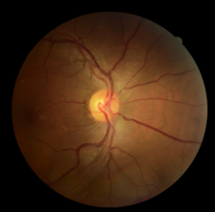

In [34]:
imagem_1 = cv2.imread('/content/imagem1.png',1)
cv2_imshow(imagem_1)

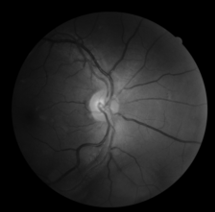

In [35]:
#APLICANDO GRAYSCALE

imagem_1_grayscale = grayscale(imagem_1)
cv2_imshow(imagem_1_grayscale)

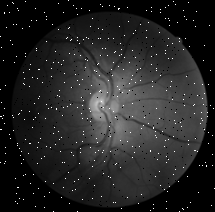

In [36]:
#APLICANDO SAL PIMENTA
imagem_1_sal_pimenta = salpimenta(imagem_1_grayscale)
cv2_imshow(imagem_1_sal_pimenta)

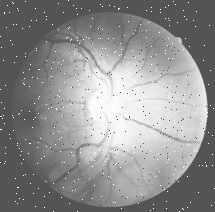

In [37]:
#APLICANDO EQUALIZAÇÃO

imagem_1_equalizada = eq_hist(imagem_1_sal_pimenta)
cv2_imshow(imagem_1_equalizada)

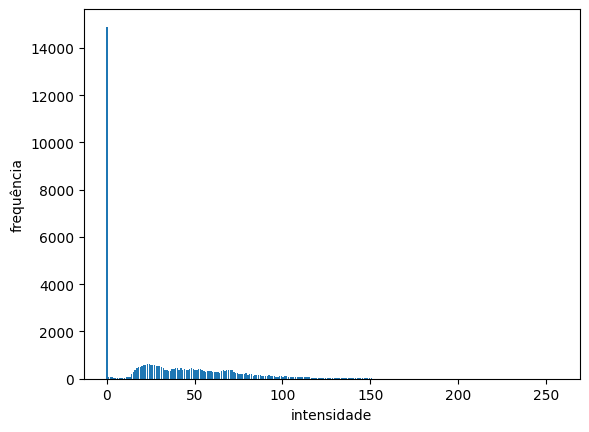

In [40]:
x = np.linspace(0,256,256)
plt.bar(x,histogram)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

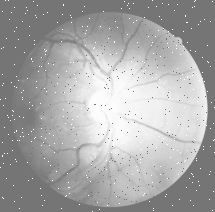

In [ ]:
#APLICANDO GAMMA

imagem_1_gamma = filtro_gamma(imagem_1_equalizada,1,0.7)
cv2_imshow(imagem_1_gamma)

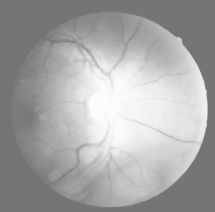

In [ ]:
# APLICANDO MEDIANA

imagem_1_mediana = filtro_mediana3(imagem_1_gamma)
cv2_imshow(imagem_1_mediana)

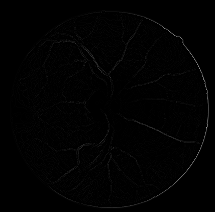

In [ ]:
#APLICANDO LAPLACIANA

imagem_1_laplaciano = filtro_laplaciano(imagem_1_mediana)
cv2_imshow(imagem_1_laplaciano)

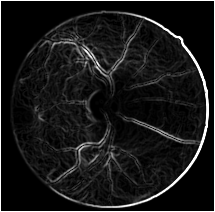

In [ ]:
#APLICANDO SOBEL

imagem_1_sobel = sobel(imagem_1_mediana)
cv2_imshow(imagem_1_sobel)

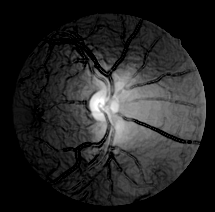

In [ ]:
#APLICANDO HIGH-BOOST

imagem_1_highboost = highboost(imagem_1_grayscale, imagem_1_sobel,1.5)
cv2_imshow(imagem_1_highboost)

# IMAGEM 1 - COMPLETO

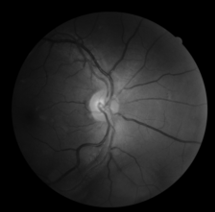

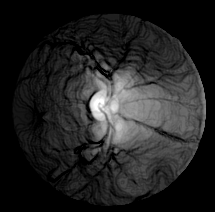

In [ ]:
imagem_1 = cv2.imread('/content/imagem1.png',1)


#APLICANDO GRAYSCALE

imagem_1_grayscale = grayscale(imagem_1)
cv2_imshow(imagem_1_grayscale)
#APLICANDO SAL PIMENTA
imagem_1_sal_pimenta = salpimenta(imagem_1_grayscale)


#APLICANDO EQUALIZAÇÃO

imagem_1_equalizada = eq_hist(imagem_1_sal_pimenta)


#APLICANDO GAMMA

imagem_1_gamma = filtro_gamma(imagem_1_equalizada,1, 1.5)


# APLICANDO MEDIANA

imagem_1_mediana = filtro_mediana7(imagem_1_gamma)

# APLICANDO GAUSSIANO

# imagem_1_mediana = filtro_gaussiano(imagem_1_mediana)

#APLICANDO SOBEL

imagem_1_sobel = sobel(imagem_1_mediana)

#aplicando laplace

# imagem_1_sobel = filtro_laplaciano(imagem_1_mediana)

#APLICANDO HIGH-BOOST

imagem_1_highboost = highboost(imagem_1_grayscale, imagem_1_sobel, 1.5)


cv2_imshow(imagem_1_highboost)

# IMAGEM 2 - COMPLETO

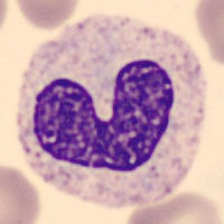

In [41]:
imagem_1 = cv2.imread('/content/blood_2_0.jpeg',1)
cv2_imshow(imagem_1)

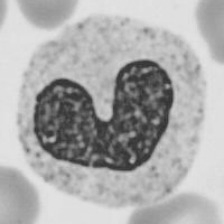

In [42]:
#APLICANDO GRAYSCALE

imagem_1_grayscale = grayscale(imagem_1)
cv2_imshow(imagem_1_grayscale)

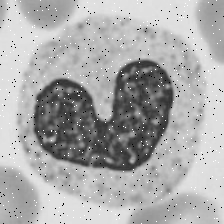

In [43]:
#APLICANDO SAL PIMENTA
imagem_1_sal_pimenta = salpimenta(imagem_1_grayscale)
cv2_imshow(imagem_1_sal_pimenta)

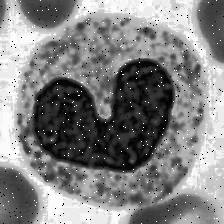

In [44]:
#APLICANDO EQUALIZAÇÃO

imagem_1_equalizada = eq_hist(imagem_1_sal_pimenta)
cv2_imshow(imagem_1_equalizada)

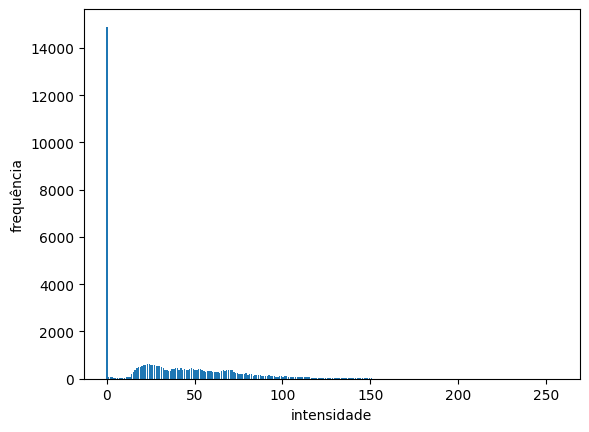

In [45]:
x = np.linspace(0,256,256)
plt.bar(x,histogram)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

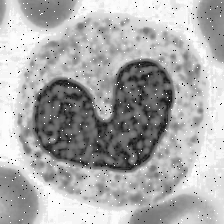

In [ ]:
#APLICANDO GAMMA

imagem_1_gamma = filtro_gamma(imagem_1_equalizada,1,0.5)
cv2_imshow(imagem_1_gamma)

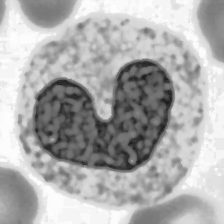

In [ ]:
# APLICANDO MEDIANA

imagem_1_mediana = filtro_mediana3(imagem_1_gamma)
cv2_imshow(imagem_1_mediana)

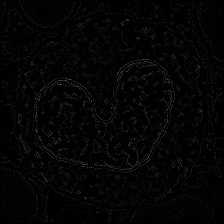

In [ ]:
#APLICANDO LAPLACIANA

imagem_1_laplaciano = filtro_laplaciano(imagem_1_mediana)
cv2_imshow(imagem_1_laplaciano)

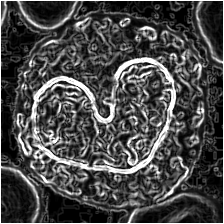

In [ ]:
#APLICANDO SOBEL

imagem_1_sobel = sobel(imagem_1_mediana)
cv2_imshow(imagem_1_sobel)

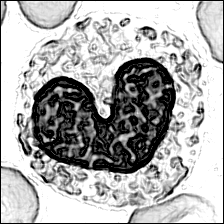

In [ ]:
#APLICANDO HIGH-BOOST

imagem_1_highboost = highboost(imagem_1_grayscale, imagem_1_sobel,1.5)
cv2_imshow(imagem_1_highboost)

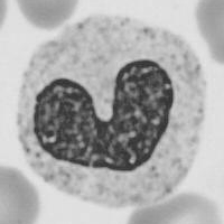

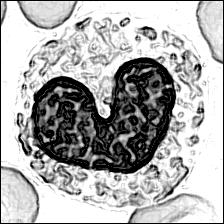

In [ ]:
imagem_2 = cv2.imread('/content/blood_2_0.png',1)
# cv2_imshow(imagem_2)

#APLICANDO GRAYSCALE

imagem_2_grayscale = grayscale(imagem_2)
# print(f'\GRAYSCALE:')
cv2_imshow(imagem_2_grayscale)
#APLICANDO SAL PIMENTA

# print(f'\SAL:')
imagem_2_sal_pimenta = salpimenta(imagem_2_grayscale)
# cv2_imshow(imagem_2_sal_pimenta)

#APLICANDO EQUALIZAÇÃO

# print(f'\EQUALIZAÇÃO:')
imagem_2_equalizada = eq_hist(imagem_2_sal_pimenta)
# cv2_imshow(imagem_2_equalizada)

#APLICANDO GAMMA

# print(f'\GAMMA:')
imagem_2_gamma = filtro_gamma(imagem_2_equalizada, 1, 0.5)
# cv2_imshow(imagem_2_gamma)

#APLICANDO MEDIANA

# print(f'\MEDIANA:')
imagem_2_mediana = filtro_mediana3(imagem_2_gamma)
# cv2_imshow(imagem_2_mediana)


# #APLICANDO GAUSSIANO

# print(f'\GAUSSIANO:')
# imagem_2_mediana = filtro_gaussiano(imagem_2_gamma)
# cv2_imshow(imagem_2_sal_pimenta)

#APLICANDO SOBEL
# print(f'\SOBEL:')
imagem_2_sobel = sobel(imagem_2_mediana)
# cv2_imshow(imagem_2_sobel)

# #aplicando laplace
# print(f'\laplace:')
# imagem_2_sobel = filtro_laplaciano(imagem_2_mediana)
# cv2_imshow(imagem_2_sobel)

#APLICANDO HIGH-BOOST

imagem_2_highboost = highboost(imagem_2_grayscale, imagem_2_sobel, 1.5)
cv2_imshow(imagem_2_highboost)